In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(boston_url)

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Become familiar with data

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 4 : Generate Descriptive statistics and Visualizations

### Q1:For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median Values of owner-occupied homes')

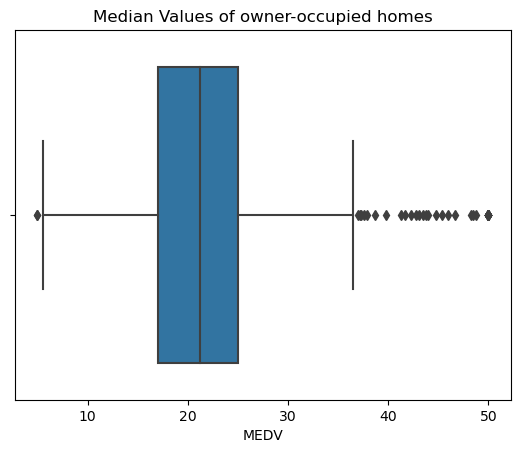

In [12]:
a=sns.boxplot(x='MEDV',data=df)
a.set_title('Median Values of owner-occupied homes')

we can find that there are outliers in the median values of owner occupied homes

### Q2: Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles river variable')

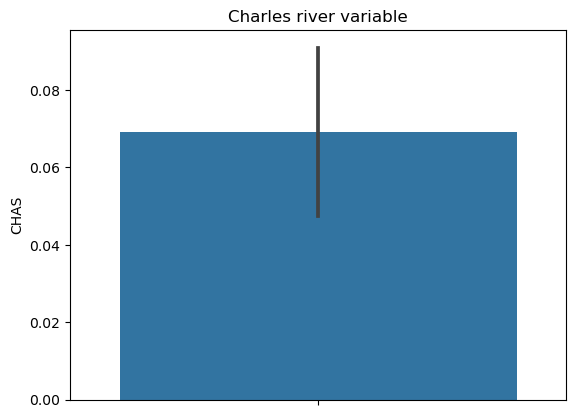

In [17]:
ax=sns.barplot(y='CHAS',data=df)
ax.set_title("Charles river variable")

### Q3:Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median values of owner-occupied home by age group')

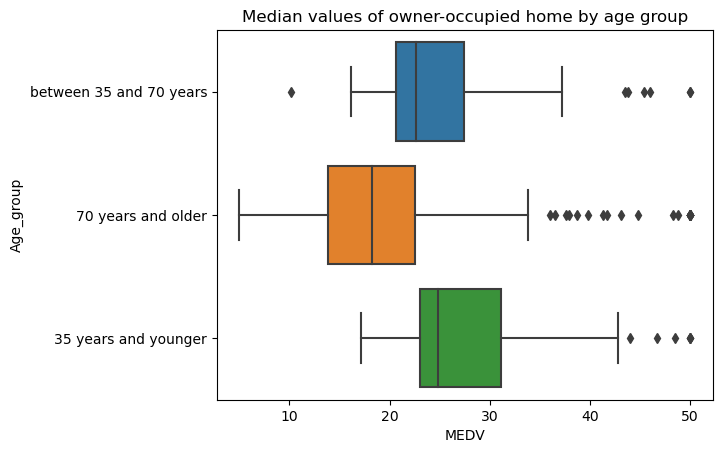

In [22]:
df.loc[(df['AGE'] <= 35),'Age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)& (df['AGE'] < 70),'Age_group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70),'Age_group'] = '70 years and older'

ax=sns.boxplot(x='MEDV',y='Age_group',data=df)
ax.set_title('Median values of owner-occupied home by age group')

### Q4:Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

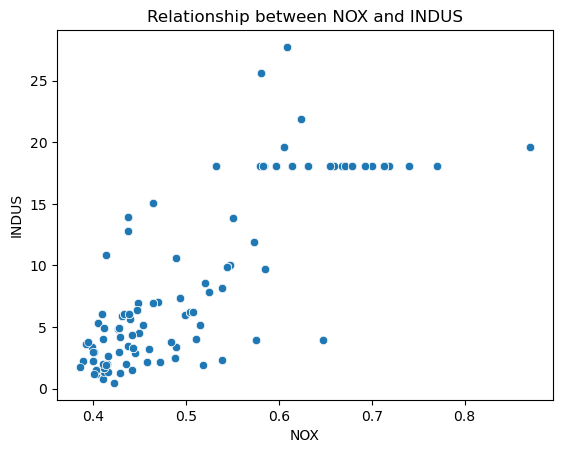

In [25]:
ax=sns.scatterplot(x='NOX',y='INDUS',data=df)
ax.set_title("Relationship between NOX and INDUS")

Values in the bottom-left section of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.

Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

### Q5:Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Distribution of pupil to teacher ratio variable')

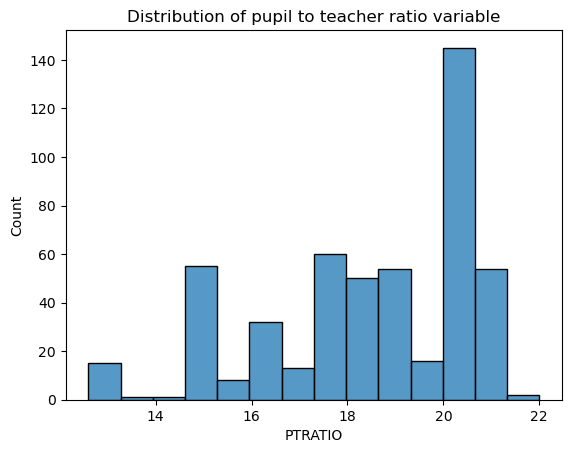

In [26]:
ax=sns.histplot(x='PTRATIO',data=df)
ax.set_title('Distribution of pupil to teacher ratio variable')

## Task 5: Use the appropriate tests to answer the questions provided.

### Q1:Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0:There is no significant difference in median value of houses bounded by 
    the Charles river
H1:There is a significant difference in median value of houses bounded by 
    the Charles river

In [29]:
df.loc[(df['CHAS']==0),'CHAS_T']='far'
df.loc[(df['CHAS']==1),'CHAS_T']='near'

scipy.stats.ttest_ind(df[df['CHAS_T'] == 'far']['MEDV'],
                   df[df['CHAS_T'] == 'near']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Here we can see that the pvalue is 0.00007 and the statistic value which we are 
calculated is -3.99 which is statistic values > p values, so we reject the H0(null hypothesis)

#### Inference:
    There is a significant differnece in median values of house bounded by charles river

### Q2:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypotesis(H0): There is no statistical
    difference in Median values of houses (MEDV) for each proportion of 
    owner occpied units built prior to 1940

Alternative Hypothesis(H1): There is statistical
    difference in Median values of houses (MEDV)
    for each proportion of owner occpied units built prior to 1940

In [34]:
from statsmodels.formula.api import ols
lm=ols('MEDV ~ AGE',data=df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


Given that the pvalue is less than the statistic value so we reject the null hypotheis H0

#### Inference:
    There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
    

### Q3:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis(H0): Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis(H1): Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [36]:
scipy.stats.pearsonr(df['NOX'],df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

Here the p-value is less than the statistic values so we reject the null hypothesis

#### Inference:

    Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

### Q4:What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [37]:
x = df['DIS']
y = df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        08:40:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes